In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/celebal-ana-verse-h/train.parquet
/kaggle/input/celebal-ana-verse-h/sample_submission.parquet
/kaggle/input/celebal-ana-verse-h/test.parquet


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_parquet('/kaggle/input/celebal-ana-verse-h/train.parquet')

In [27]:
tests = pd.read_parquet('/kaggle/input/celebal-ana-verse-h/test.parquet')

In [ ]:
df.head()

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0


In [6]:
tests.head()

,ID,Date,X1,X2,X3,X4,X5
0,0,2020-12-16,1.685395,5.463917,1.0,7.389056,2.890372
1,1,2020-12-16,1.488844,5.454936,1.0,7.389056,2.890372
2,2,2020-12-16,1.164160,5.471136,1.0,1.000000,2.890372
3,3,2020-12-16,1.000000,5.467385,1.0,1.000000,2.890372
4,4,2020-12-16,1.000000,5.453995,1.0,1.000000,2.833213


In [ ]:
df.shape

In [14]:
df.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1639424 non-null  datetime64[ns]
 1   X1      1639424 non-null  float64       
 2   X2      1639424 non-null  float64       
 3   X3      1639424 non-null  float64       
 4   X4      1639424 non-null  float64       
 5   X5      1639424 non-null  float64       
 6   target  1639424 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 87.6+ MB


In [5]:
df['target'].value_counts()

target
0    1625386
1      14038
Name: count, dtype: int64

In [4]:
# Date and time split

df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)



In [8]:
df.head()

,Date,X1,X2,X3,X4,X5,target,day,weekday,month,is_weekend
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0,16,2,12,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1,16,2,12,0
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1,16,2,12,0
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1,16,2,12,0
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0,16,2,12,0


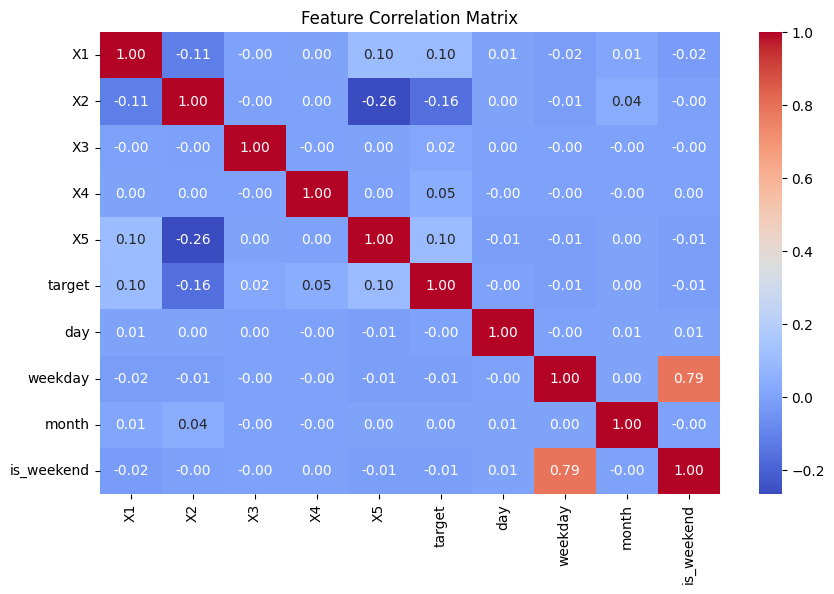

In [28]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns='Date').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [8]:
import warnings
warnings.filterwarnings("ignore")

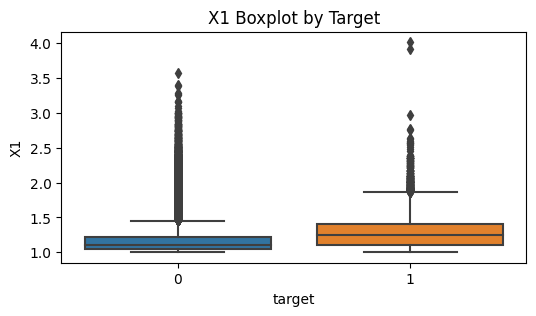

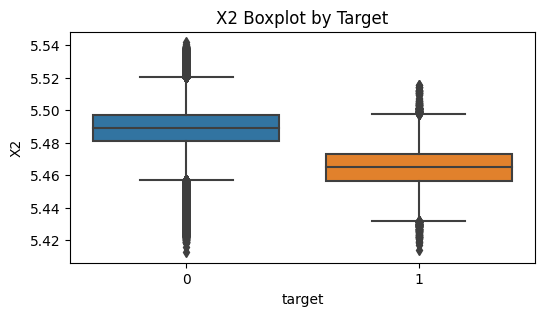

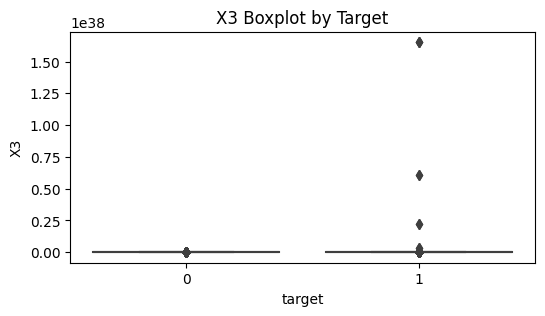

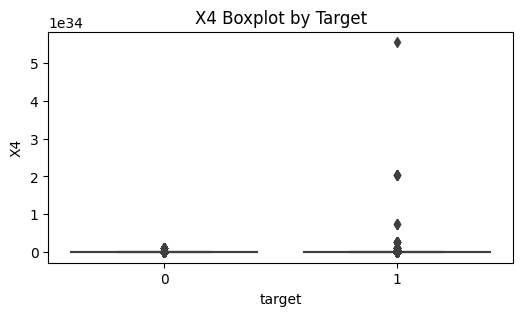

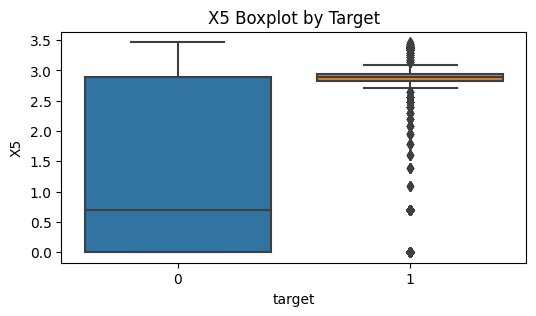

In [32]:
# Finding Outliers
for feature in features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} Boxplot by Target')
    plt.show()


In [5]:
df = df.drop("Date",axis = 1)

In [6]:

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['X1', 'X2', 'X3', 'X4', 'X5']] = scaler.fit_transform(df[['X1', 'X2', 'X3', 'X4', 'X5']])

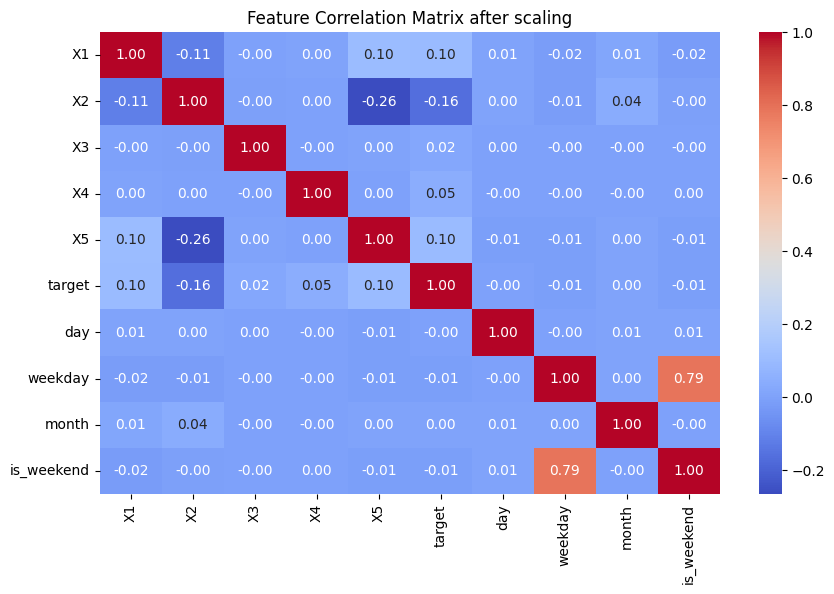

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix after scaling')
plt.show()

In [7]:
X = df.drop('target',axis = 1)
y = df['target']


# Model building and hyperparameter tuning


In [8]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)

In [13]:
# over samping to baance the data set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [14]:
y_resampled.value_counts()

target
0    1300309
1    1300309
Name: count, dtype: int64

In [22]:
lr = LogisticRegression(class_weight='balanced',max_iter=4000)
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9914360217759275
F1 Score: 0.0
Confusion Matrix:
 [[325077      0]
 [  2808      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    325077
           1       0.00      0.00      0.00      2808

    accuracy                           0.99    327885
   macro avg       0.50      0.50      0.50    327885
weighted avg       0.98      0.99      0.99    327885



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc = SVC()
svc.fit(X_resampled, y_resampled)
y_pred = svc.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


In [24]:
# knn

knn_model = KNeighborsClassifier()
knn_model.fit(X_resampled, y_resampled)

y_pred = knn_model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.986952742577428
F1 Score: 0.5287508261731659
Confusion Matrix:
 [[321207   3870]
 [   408   2400]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    325077
           1       0.38      0.85      0.53      2808

    accuracy                           0.99    327885
   macro avg       0.69      0.92      0.76    327885
weighted avg       0.99      0.99      0.99    327885



In [26]:
# DT 
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_resampled, y_resampled)

y_pred = tree_model.predict(X_val)

print("Decision Tree:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Decision Tree:
Accuracy: 0.9920307424859326
F1 Score: 0.610174548709533
Confusion Matrix:
 [[323227   1850]
 [   763   2045]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    325077
           1       0.53      0.73      0.61      2808

    accuracy                           0.99    327885
   macro avg       0.76      0.86      0.80    327885
weighted avg       0.99      0.99      0.99    327885



* random forest has better performace thant others so hyper parameter tuning can hepl it perform better

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import numpy as np

# Scaling the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_val = scaler.transform(X_val)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with batch gradient descent
history = model.fit(
    X_resampled, y_resampled,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=450,
    callbacks=[early_stop],
    verbose=1
)

# Evaluation
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype("int32")

print("ANN Model Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred_binary))
print("F1 Score:", f1_score(y_val, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_binary))
print("Classification Report:\n", classification_report(y_val, y_pred_binary))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5780/5780 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8494 - loss: 0.3436 - val_accuracy: 0.8769 - val_loss: 0.2769
Epoch 2/50
5780/5780 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8952 - loss: 0.2583 - val_accuracy: 0.8783 - val_loss: 0.2716
Epoch 3/50
5780/5780 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9004 - loss: 0.2452 - val_accuracy: 0.8833 - val_loss: 0.2569
Epoch 4/50
5780/5780 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9030 - loss: 0.2381 - val_accuracy: 0.8845 - val_loss: 0.2527
Epoch 5/50
5780/5780 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9053 - loss: 0.2319 - val_accuracy: 0.8848 - val_loss: 0.2500
Epoch 6/50
5780/5780 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9065 - loss: 0.2285 - val_accuracy: 0.8887 - val_loss: 0.2388
Epoch 7/50
5780/5780 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9080 - loss: 0.2250 - val_accuracy: 0.8886 - val_loss: 0.2409
Epoch 8/50
5780/5780 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9091 - loss: 0

In [29]:
# RandomForest RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # number of random configs to try
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit to resampled data (imbalanced solved)
random_search.fit(X_resampled, y_resampled)

# Best model
best_rf = random_search.best_estimator_

# Predict on validation set
y_pred = best_rf.predict(X_val)

# Evaluation
print("Best Random Forest Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [30]:
# Extract features
test['day'] = test['Date'].dt.day
test['month'] = test['Date'].dt.month
test['weekday'] = test['Date'].dt.weekday
test['is_weekend'] = test['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Drop 'Date' for prediction and save 'id' for submission
ids = test['ID']
test.drop(columns=['ID', 'Date'], inplace=True)

# Ensure feature order matches training
expected_features = rf_model.feature_names_in_
X_test_final = test[expected_features]

# Make predictions
y_test_pred = rf_model.predict(X_test_final)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'ID': ids,
    'target': y_test_pred
})

# Save to .parquet
submission_df.to_parquet('/kaggle/working/submission.parquet', index=False)

print("Submission saved ")


Submission saved 


In [29]:
submission_df

,ID,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
409851,409851,0
409852,409852,0
409853,409853,0
409854,409854,0
